# overview 
In this notebook we will compute and plot the TF difference between two group of trials for selective channels.


# load the decdoing result

In [ ]:
# import functions

import pandas as pd
import numpy as np  
import submitit

import os 
from pathlib import Path
from extraction_data import get_pid_eid_pairs
from Time_frequency_selectives import  load_decoding_results, selective_channels 

# get the pid and eid of the sessions to analyze
regionOfInterest = ['VISp'] # regions to include
pid_eid_pairs = get_pid_eid_pairs( regions = regionOfInterest,only_passive= True)

# get the decoding results
decoding_results_dir = os.path.join(str(Path(os.getcwd()).resolve().parent.parent), 'Decoding_spikes', 'results')
results = load_decoding_results(pid_eid_pairs, suffix = 'v1_TPassive_TActive' , dir = decoding_results_dir)
right_selective, left_selective, right_sensitive, left_sensitive, neutral = selective_channels(results,p_value_threshold = 0.05, accuracy_threshold = 0.57 )

# 1) TFR left 80  - left 20 blocks during anticiaption of the target in left selective electrodes

## TFR computation

In [ ]:
from Time_frequency_selectives import TF_in_one_big_job
import submitit

cpus = os.cpu_count()
BiasLeft_preprocessing = { 'tmin': -1, 'tmax': 0, 'contrasts': 'all', 'stim_side': "both", 'prob_left': [0.8], 'remove_first_trials_of_block': True, 'save': False}
BiasRight_preprocessing = { 'tmin': -1, 'tmax': 0, 'contrasts': 'all', 'stim_side': "both", 'prob_left': [0.2], 'remove_first_trials_of_block': True, 'save': False}

freqs = np.arange(1, 50, 1)
TF_parameters = {'n_cycles': freqs/5, 'time_bandwidth': 4.0, 'n_jobs': cpus}
version = 'bipolar'
file_name = f'BiasLeft_BiasRight_antic_{version}.pkl'

executor = submitit.AutoExecutor(folder="logs")
# set timeout in min, and partition for running the job
executor.update_parameters(timeout_min= 480, slurm_partition="dev", cpus_per_task = cpus, mem_gb= cpus*4 - 1.5) 
job_1 = executor.submit(TF_in_one_big_job, left_selective, BiasLeft_preprocessing, BiasRight_preprocessing, freqs, TF_parameters, version, file_name)


## Plot the result

Loaded 5 channel entries from TF data file.


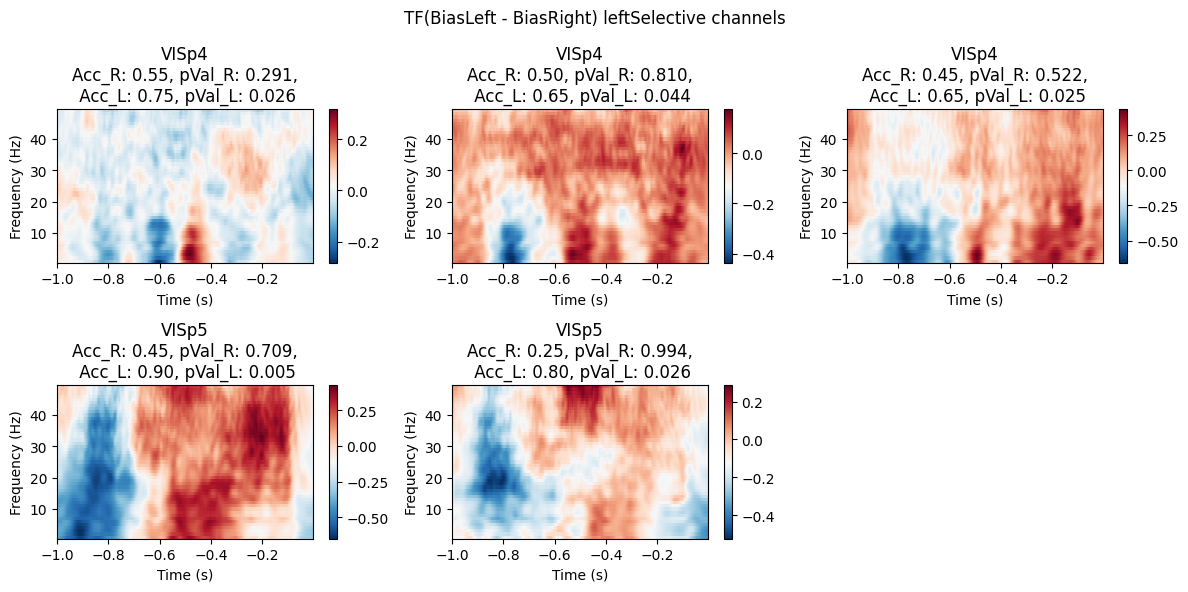

In [12]:

import os 
import numpy as np
from pathlib import Path
from Time_frequency_selectives import load_tf_data, plot_all_tf_by_layers
# Example usage:
# Adjust the file path as needed. Here we assume the file is saved in a "TF_data" directory
# that is a sibling of the current working directory.
base_dir = Path(os.getcwd()).resolve() # adjust if necessary
tf_data_dir = os.path.join(base_dir, 'TF_data')  # adjust if necessary
file_name = "BiasLeft_BiasRight_antic_bipolar.pkl"  # change if needed
file_path = os.path.join(tf_data_dir, file_name)

# Load the TF data.
tf_data_list = load_tf_data(file_path)
print(f"Loaded {len(tf_data_list)} channel entries from TF data file.")

# Plot all channels arranged by layer in one figure.
plot_all_tf_by_layers(tf_data_list,title = 'TF(BiasLeft - BiasRight) leftSelective channels', region_prefix='VISp')
